<a href="https://colab.research.google.com/github/PD7-debug/Assignment-Mod-1/blob/main/KNN_PCA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Theory Question

## Q1. What is K-Nearest Neighbors (KNN) and how does it work?

**Answer:** K-Nearest Neighbors (KNN) is a non-parametric algorithm that stores all available cases and classifies new data points based on a similarity measure (e.g., distance). It assigns a class by majority vote among the K nearest neighbors.

## Q2. What is the difference between KNN Classification and KNN Regression?

**Answer:** KNN Classification assigns a class label based on the majority vote among the nearest neighbors. KNN Regression predicts the average (or weighted average) of the values of the nearest neighbors.

## Q3. What is the role of the distance metric in KNN?

**Answer:** The distance metric (such as Euclidean or Manhattan) determines how the 'nearest' neighbors are selected. It significantly affects the performance of the algorithm by influencing neighbor selection.

## Q4. What is the Curse of Dimensionality in KNN?

**Answer:** The Curse of Dimensionality refers to the problem where data becomes sparse in high-dimensional space, making distance measures less meaningful and degrading the performance of KNN.

## Q5. How can we choose the best value of K in KNN?

**Answer:** Common techniques include using cross-validation to evaluate accuracy for different values of K and selecting the value with the highest accuracy or lowest error.

## Q6. What are KD Tree and Ball Tree in KNN?

**Answer:** KD Tree and Ball Tree are efficient data structures for nearest neighbor searches. KD Tree works well for low-dimensional data, while Ball Tree is better for higher dimensions.

## Q7. When should you use KD Tree vs. Ball Tree?

**Answer:** Use KD Tree for low-dimensional datasets (typically <20 dimensions). Use Ball Tree for higher-dimensional data or when KD Tree becomes inefficient.

## Q8. What are the disadvantages of KNN?

**Answer:** KNN can be slow with large datasets, is sensitive to irrelevant or redundant features, and its performance depends heavily on the choice of K and distance metric.

## Q9. How does feature scaling affect KNN?

**Answer:** Feature scaling ensures that all features contribute equally to the distance calculation. Without scaling, features with larger ranges can dominate the metric.

## Q10. What is PCA (Principal Component Analysis)?

**Answer:** PCA is a dimensionality reduction technique that transforms a dataset into a set of linearly uncorrelated variables called principal components, which capture the most variance.

## Q11. How does PCA work?

**Answer:** PCA works by computing the covariance matrix of the data, finding its eigenvalues and eigenvectors, and projecting the data onto the directions of maximum variance (principal components).

## Q12. What is the geometric intuition behind PCA?

**Answer:** Geometrically, PCA rotates the coordinate axes to align with directions of maximum variance, reducing dimensionality while preserving as much information as possible.

## Q13. What is the difference between Feature Selection and Feature Extraction?

**Answer:** Feature Selection chooses a subset of existing features. Feature Extraction (like PCA) creates new features by transforming the original ones.

## Q14. What are Eigenvalues and Eigenvectors in PCA?

**Answer:** Eigenvalues measure the amount of variance carried in the direction of an eigenvector. Eigenvectors represent the direction of the principal components.

## Q15. How do you decide the number of components to keep in PCA?

**Answer:** A common method is to keep components that explain a cumulative variance (e.g., 95%). Scree plots are often used to determine this visually.

## Q16. Can PCA be used for classification?

**Answer:** Yes, PCA can be used for classification by reducing dimensionality before applying classifiers, potentially improving performance and reducing overfitting.

## Q17. What are the limitations of PCA?

**Answer:** PCA assumes linear relationships and is sensitive to outliers and scaling. It may discard features important for prediction but low in variance.

## Q18. How do KNN and PCA complement each other?

**Answer:** PCA can reduce dimensionality before applying KNN, helping combat the curse of dimensionality and improving classification performance.

## Q19. How does KNN handle missing values in a dataset?

**Answer:** KNN does not handle missing values directly. Preprocessing steps like KNN imputation or mean/mode filling are typically used.

## Q20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?

**Answer:** PCA focuses on maximizing variance, while LDA maximizes class separability. PCA is unsupervised; LDA is supervised and uses class labels.

## Practical Question

## Q21. Train a KNN Classifier on the Iris dataset and print model accuracy.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.9736842105263158


## Q22. Train a KNN Regressor on a synthetic dataset and evaluate using MSE.

In [ ]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=1, noise=10)
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = KNeighborsRegressor()
model.fit(X_train, y_train)
print("MSE:", mean_squared_error(y_test, model.predict(X_test)))

MSE: 137.96647166840373


## Q23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN with Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

# KNN with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

# Print accuracies
print(f"Accuracy with Euclidean Distance: {accuracy_euclidean:.2f}")
print(f"Accuracy with Manhattan Distance: {accuracy_manhattan:.2f}")


Accuracy with Euclidean Distance: 1.00
Accuracy with Manhattan Distance: 1.00


## Q24. Train a KNN Classifier with different values of K and visualize decision boundaries.

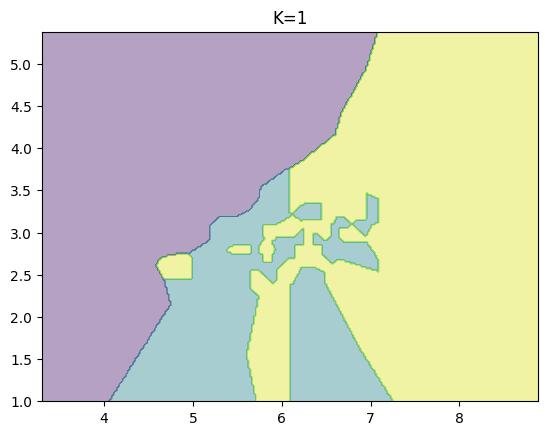

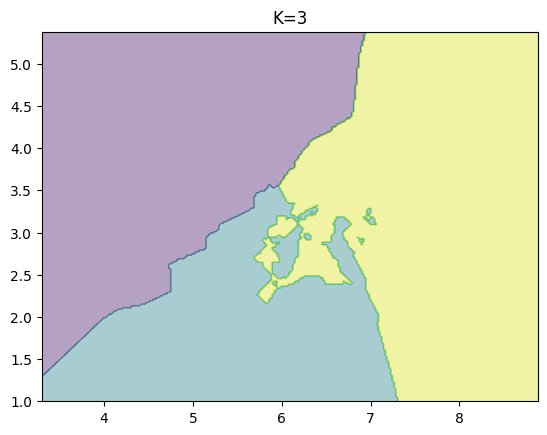

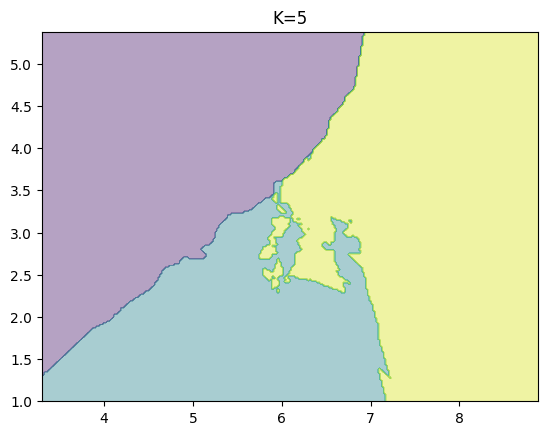

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

for k in [1, 3, 5]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X[:, :2], y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.title(f"K={k}")
    plt.show()

## Q25. Apply Feature Scaling before training a KNN model and compare results with unscaled data.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = KNeighborsClassifier()
model.fit(X_scaled, y)
print("Accuracy after scaling:", model.score(X_scaled, y))

Accuracy after scaling: 0.9533333333333334


## Q26. Train a PCA model on synthetic data and print the explained variance ratio.

In [ ]:
from sklearn.decomposition import PCA

X_synthetic, _ = make_regression(n_samples=100, n_features=5, noise=0.1)
pca = PCA()
pca.fit(X_synthetic)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.259779   0.22721697 0.19121237 0.17396688 0.14782477]


## Q27. Apply PCA before training a KNN Classifier and compare accuracy.

In [ ]:
X_pca = PCA(n_components=2).fit_transform(X_scaled)
model = KNeighborsClassifier()
model.fit(X_pca, y)
print("Accuracy after PCA:", model.score(X_pca, y))

Accuracy after PCA: 0.9466666666666667


## Q28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': list(range(1, 11))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5)
grid.fit(X, y)
print("Best K:", grid.best_params_)

Best K: {'n_neighbors': 6}


## Q29. Train a KNN Classifier and check the number of misclassified samples.

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Misclassified samples:", (y_test != y_pred).sum())

Misclassified samples: 0


## Q30. Train a PCA model and visualize cumulative explained variance.

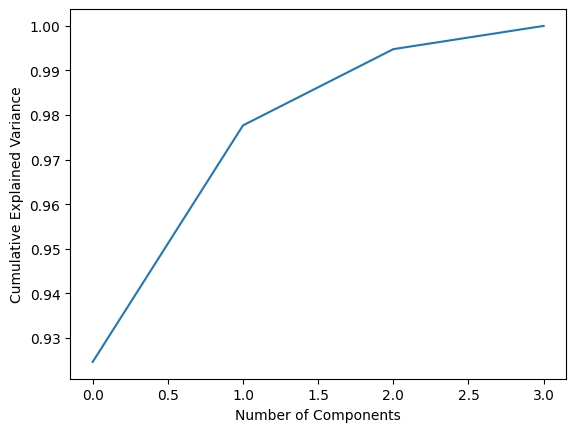

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

## Q31. Train a KNN Classifier with different `weights` (uniform vs. distance).

In [ ]:
for w in ['uniform', 'distance']:
    model = KNeighborsClassifier(weights=w)
    model.fit(X_train, y_train)
    print(f"Weight={w}: Accuracy =", model.score(X_test, y_test))

Weight=uniform: Accuracy = 1.0
Weight=distance: Accuracy = 1.0


## Q32. Train a KNN Regressor and analyze effect of different K values.

In [ ]:
for k in [1, 3, 5, 10]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    print(f"K={k}: MSE =", mean_squared_error(y_test, model.predict(X_test)))

K=1: MSE = 0.0
K=3: MSE = 0.007407407407407404
K=5: MSE = 0.011555555555555552
K=10: MSE = 0.013777777777777776


## Q33. Implement KNN Imputation for handling missing values.

In [ ]:
from sklearn.impute import KNNImputer
import numpy as np

X_missing = X.copy()
X_missing.ravel()[::10] = np.nan  # introduce some NaNs
imputer = KNNImputer()
X_imputed = imputer.fit_transform(X_missing)
print("Imputation complete. Any NaNs?", np.isnan(X_imputed).any())

Imputation complete. Any NaNs? False


## Q34. Train a PCA model and visualize data projection onto first two components.

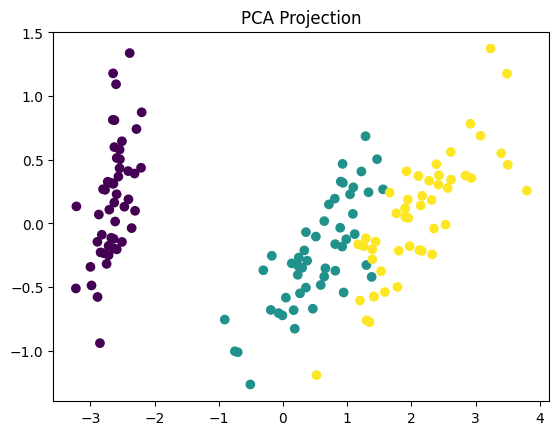

In [ ]:
X_pca = PCA(n_components=2).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("PCA Projection")
plt.show()

## Q35. Train a KNN Classifier using KD Tree and Ball Tree.

In [ ]:
for algo in ['kd_tree', 'ball_tree']:
    model = KNeighborsClassifier(algorithm=algo)
    model.fit(X_train, y_train)
    print(f"Algorithm: {algo} -> Accuracy:", model.score(X_test, y_test))

Algorithm: kd_tree -> Accuracy: 1.0
Algorithm: ball_tree -> Accuracy: 1.0


## Q36. Train a PCA model on high-dimensional data and visualize Scree plot.

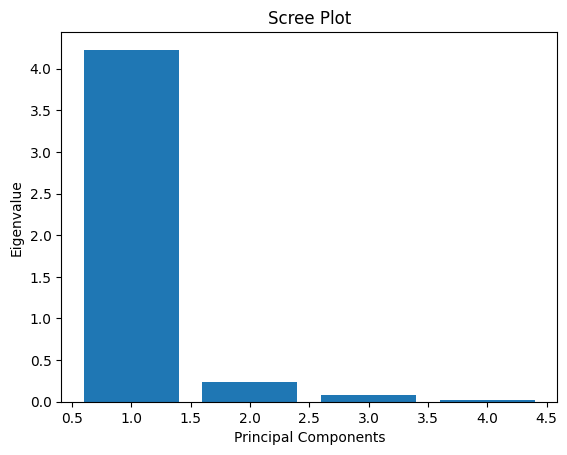

In [ ]:
pca = PCA().fit(X)
plt.bar(range(1, len(pca.explained_variance_)+1), pca.explained_variance_)
plt.xlabel("Principal Components")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot")
plt.show()

## Q37. Train a KNN Classifier and evaluate with Precision, Recall, F1-Score.

In [ ]:
from sklearn.metrics import classification_report

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Q38. Train a PCA model and analyze effect of component count on accuracy.

In [ ]:
for n in [1, 2, 3, 4]:
    X_pca = PCA(n_components=n).fit_transform(X)
    model = KNeighborsClassifier()
    model.fit(X_pca, y)
    print(f"{n} components: Accuracy =", model.score(X_pca, y))

1 components: Accuracy = 0.9333333333333333
2 components: Accuracy = 0.98
3 components: Accuracy = 0.9666666666666667
4 components: Accuracy = 0.9666666666666667


## Q39. Train a KNN Classifier with different `leaf_size` values.

In [ ]:
for size in [10, 20, 30, 50]:
    model = KNeighborsClassifier(leaf_size=size)
    model.fit(X_train, y_train)
    print(f"Leaf size {size}: Accuracy =", model.score(X_test, y_test))

Leaf size 10: Accuracy = 1.0
Leaf size 20: Accuracy = 1.0
Leaf size 30: Accuracy = 1.0
Leaf size 50: Accuracy = 1.0


## Q40. Train a PCA model and visualize before-and-after transformation.

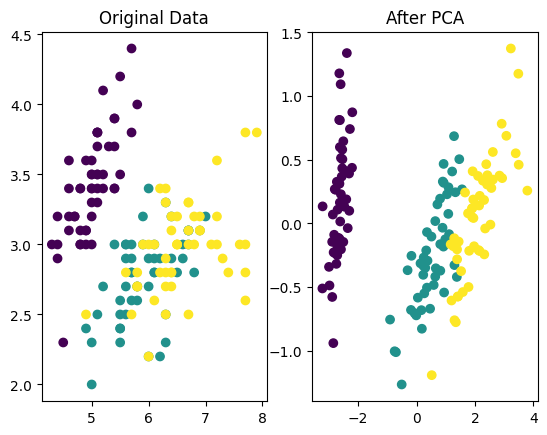

In [ ]:
X_pca = PCA(n_components=2).fit_transform(X)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Original Data")
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("After PCA")
plt.show()

## 41.Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report.


In [24]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load data
data = load_wine()
X = data.data
y = data.target
X_scaled = StandardScaler().fit_transform(X)

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



## Q42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error.

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

for p in [1, 2, 3]:  # Manhattan, Euclidean, and Minkowski
    knn_reg = KNeighborsRegressor(p=p)
    knn_reg.fit(X_train, y_train.astype(float))
    y_pred_reg = knn_reg.predict(X_test)
    mse = mean_squared_error(y_test.astype(float), y_pred_reg)
    print(f"MSE (p={p}): {mse:.4f}")


MSE (p=1): 0.0098
MSE (p=2): 0.0116
MSE (p=3): 0.0124


## Q43. Train a KNN Classifier and evaluate using ROC-AUC score.


In [25]:
from sklearn.metrics import roc_auc_score

y_proba = knn.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.998536745905167


## Q44.  Train a PCA model and visualize the variance captured by each principal component.

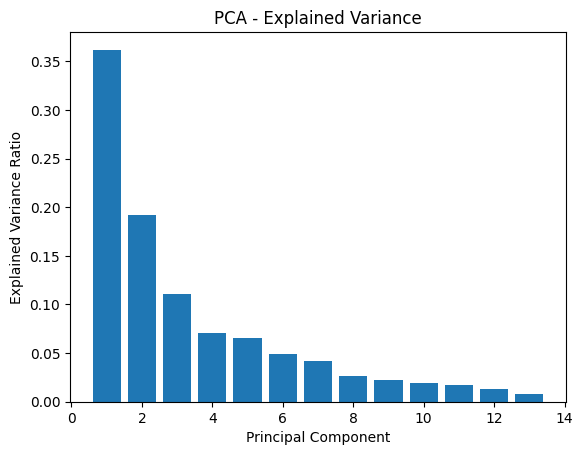

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_scaled)
plt.figure()
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance')
plt.show()


## Q45. Train a KNN Classifier and perform feature selection before training.

In [27]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_scaled, y)

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_selected, y, test_size=0.3, random_state=42)
knn_fs = KNeighborsClassifier()
knn_fs.fit(X_train_fs, y_train_fs)
y_pred_fs = knn_fs.predict(X_test_fs)

print(classification_report(y_test_fs, y_pred_fs))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



## Q46. Train a PCA model and visualize the data reconstruction error after reducing dimensions.

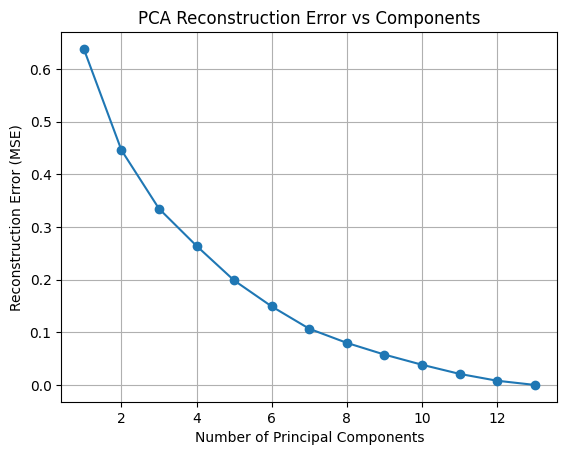

In [28]:
import numpy as np

errors = []
components = list(range(1, X.shape[1] + 1))
for n in components:
    pca_n = PCA(n_components=n)
    X_reduced = pca_n.fit_transform(X_scaled)
    X_reconstructed = pca_n.inverse_transform(X_reduced)
    error = np.mean((X_scaled - X_reconstructed) ** 2)
    errors.append(error)

plt.figure()
plt.plot(components, errors, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('PCA Reconstruction Error vs Components')
plt.grid(True)
plt.show()


## Q47. Train a KNN Classifier and visualize the decision boundary.

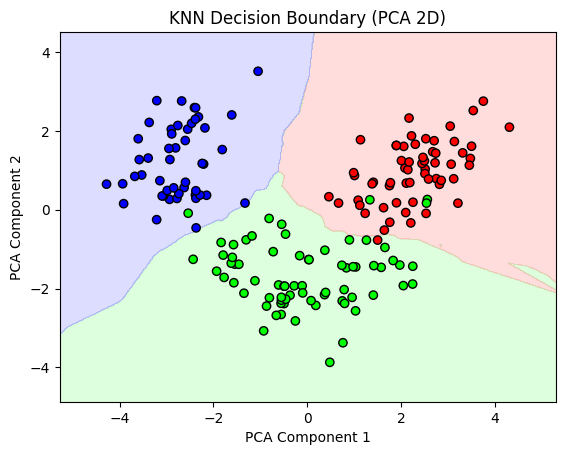

In [29]:
from matplotlib.colors import ListedColormap

pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.3, random_state=42)
knn_2d = KNeighborsClassifier()
knn_2d.fit(X_train_2d, y_train_2d)

# Plot decision boundary
h = .02
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.title("KNN Decision Boundary (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


## Q48. Train a PCA model and analyze the effect of different numbers of components on data variance.


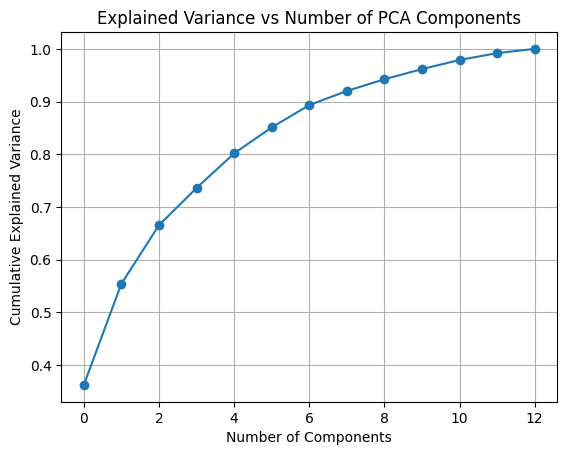

In [30]:
explained_variance = pca.explained_variance_ratio_

plt.figure()
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of PCA Components')
plt.grid(True)
plt.show()
